In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
df=pd.read_csv("diabetes.csv")

## EDA

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
dfCopy=df.copy(deep=True)

In [5]:
dfCopy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=dfCopy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(dfCopy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [6]:
dfCopy['Glucose'].fillna(dfCopy['Glucose'].mean(), inplace = True)
dfCopy['BloodPressure'].fillna(dfCopy['BloodPressure'].mean(), inplace = True)
dfCopy['SkinThickness'].fillna(dfCopy['SkinThickness'].median(), inplace = True)
dfCopy['Insulin'].fillna(dfCopy['Insulin'].median(), inplace = True)
dfCopy['BMI'].fillna(dfCopy['BMI'].median(), inplace = True)

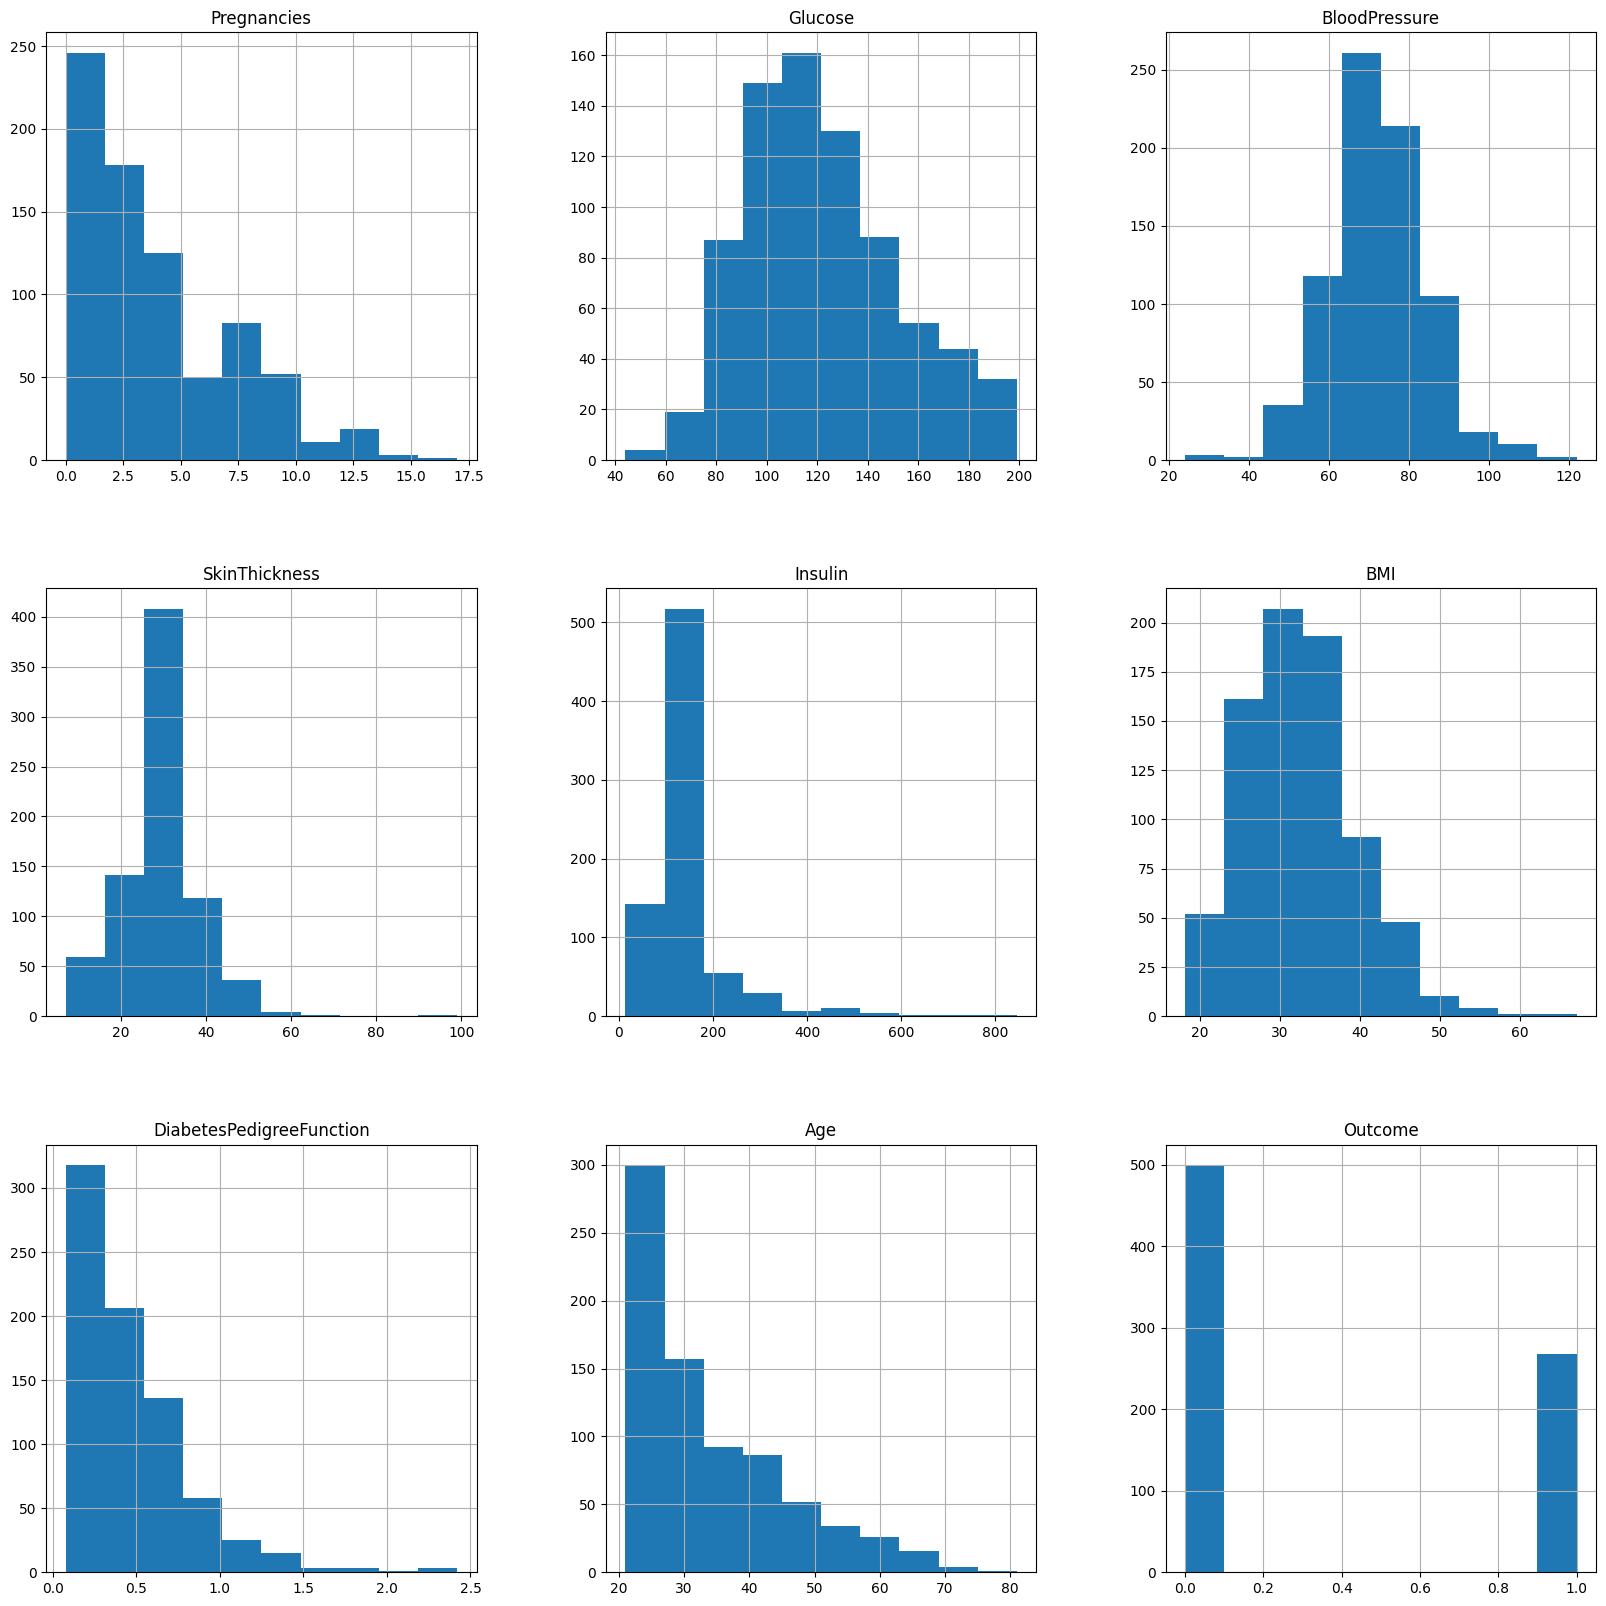

In [7]:
p=dfCopy.hist(figsize=(20,20))

Outcome
0    500
1    268
Name: count, dtype: int64


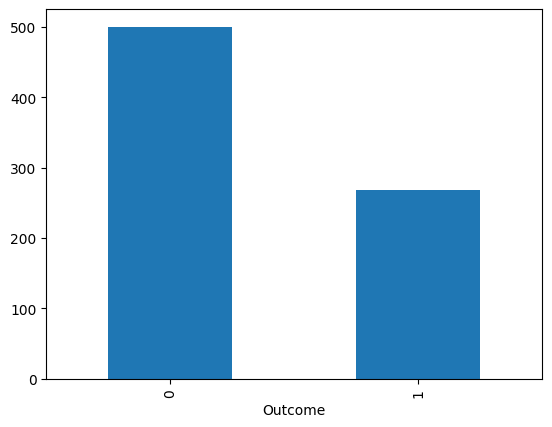

In [8]:
colorWheel={1: "0392cf",
            2: "#7bc043"}
colors=dfCopy['Outcome'].map(lambda x:colorWheel.get(x+1))
print(dfCopy.Outcome.value_counts())
p=dfCopy.Outcome.value_counts().plot(kind="bar")

## Scaling the dataset before applying Machine Learning

In [9]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(dfCopy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX =  pd.DataFrame(sc_X.fit_transform(dfCopy.drop(["Outcome"],axis = 1),),\n        columns=[\'Pregnancies\', \'Glucose\', \'BloodPressure\', \'SkinThickness\', \'Insulin\',\n       \'BMI\', \'DiabetesPedigreeFunction\', \'Age\'])'

In [10]:
X = dfCopy.drop(['Outcome'],axis=1)
y=dfCopy.Outcome

## Train Test Split and Cross validation

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3, random_state=42, stratify=y)

## K Nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier
testScores=[]
trainScores=[]

for i in range(1,15):
    KNN=KNeighborsClassifier(i)
    KNN.fit(X_train,y_train)

    trainScores.append(KNN.score(X_train,y_train))
    testScores.append(KNN.score(X_test,y_test))

In [13]:
KNN=KNeighborsClassifier(11)
KNN.fit(X_train,y_train)
KNN.score(X_test,y_test)

0.7109375

Text(0.5, 23.52222222222222, 'Predicted label')

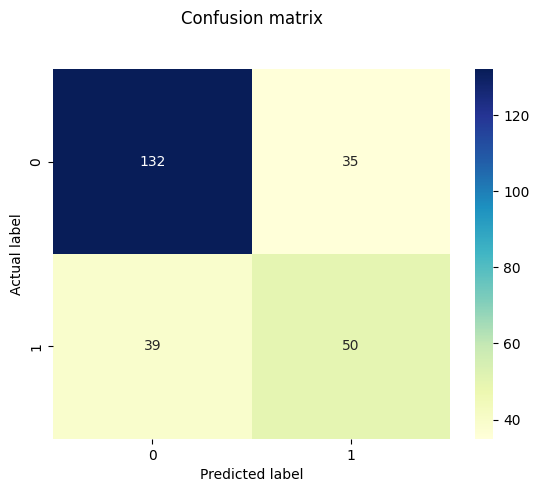

In [14]:
y_pred = KNN.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       167
           1       0.59      0.56      0.57        89

    accuracy                           0.71       256
   macro avg       0.68      0.68      0.68       256
weighted avg       0.71      0.71      0.71       256



In [16]:
fileName="KNN.sav"
pickle.dump(KNN,open(fileName,'wb'))

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)
LR.score(X_test,y_test)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.73046875

Text(0.5, 23.52222222222222, 'Predicted label')

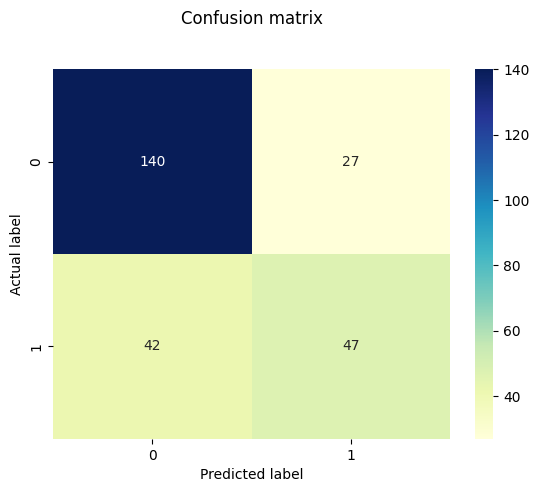

In [18]:
y_pred = LR.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       167
           1       0.64      0.53      0.58        89

    accuracy                           0.73       256
   macro avg       0.70      0.68      0.69       256
weighted avg       0.72      0.73      0.72       256



In [20]:
fileName="LR.sav"
pickle.dump(LR,open(fileName,'wb'))

## Random Forest Classifier

In [23]:
RF=RandomForestClassifier(criterion='gini',min_samples_leaf=1,min_samples_split=10,n_estimators=100,oob_score=True,random_state=1,n_jobs=-1)

RF.fit(X_train,y_train)
RF.score(X_test,y_test)

0.73828125

Text(0.5, 23.52222222222222, 'Predicted label')

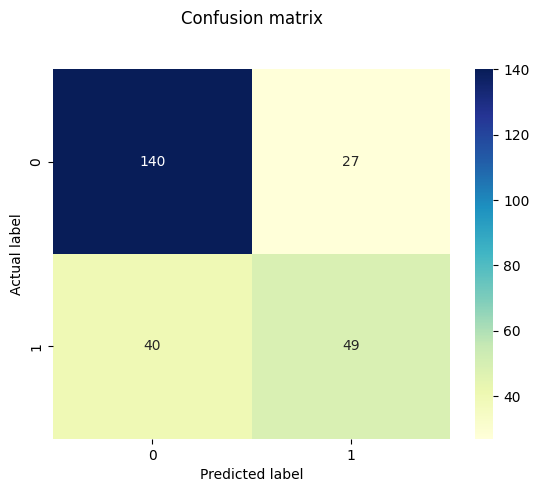

In [24]:
y_pred = RF.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.84      0.81       167
           1       0.64      0.55      0.59        89

    accuracy                           0.74       256
   macro avg       0.71      0.69      0.70       256
weighted avg       0.73      0.74      0.73       256



In [26]:
fileName="RF.sav"
pickle.dump(RF,open(fileName,'wb'))

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score

models=[
    ('LogisticRegression',LogisticRegression(random_state=0)),
    ('RandomForest',RandomForestClassifier()),
    ('KNearestNeighbors',KNeighborsClassifier()),
    ('SupportVectorMachine',SVC(gamma='auto')),
    ('NaiveBayes',GaussianNB())
]

results=[]
names=[]
scoring=['accuracy','precision_weighted','recall_weighted','f1_weighted','roc_auc']
target_names=['positive','negative']
acc_score=[]

for name,model in models:
    kfold=model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results=model_selection.cross_validate(model, X_train,y_train, cv=kfold, scoring=scoring)
    clf=model.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(name)
    names.append(name)
    print(classification_report(y_test,y_pred,target_names=target_names))
    CM= confusion_matrix(y_test,y_pred)
    print(CM)
    score=accuracy_score(y_test,y_pred)
    acc_score.append(score)
    print(accuracy_score(y_test,y_pred))

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

LogisticRegression
              precision    recall  f1-score   support

    positive       0.77      0.84      0.80       167
    negative       0.64      0.53      0.58        89

    accuracy                           0.73       256
   macro avg       0.70      0.68      0.69       256
weighted avg       0.72      0.73      0.72       256

[[140  27]
 [ 42  47]]
0.73046875
RandomForest
              precision    recall  f1-score   support

    positive       0.77      0.82      0.79       167
    negative       0.62      0.54      0.57        89

    accuracy                           0.72       256
   macro avg       0.69      0.68      0.68       256
weighted avg       0.72      0.72      0.72       256

[[137  30]
 [ 41  48]]
0.72265625
KNearestNeighbors
              precision    recall  f1-score   support

    positive       0.77      0.81      0.79       167
    negative       0.61      0.54      0.57        89

    accuracy                           0.72       256
   macro a

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: Unde

SupportVectorMachine
              precision    recall  f1-score   support

    positive       0.65      1.00      0.79       167
    negative       0.00      0.00      0.00        89

    accuracy                           0.65       256
   macro avg       0.33      0.50      0.39       256
weighted avg       0.43      0.65      0.52       256

[[167   0]
 [ 89   0]]
0.65234375
NaiveBayes
              precision    recall  f1-score   support

    positive       0.79      0.78      0.79       167
    negative       0.60      0.61      0.60        89

    accuracy                           0.72       256
   macro avg       0.69      0.70      0.70       256
weighted avg       0.72      0.72      0.72       256

[[131  36]
 [ 35  54]]
0.72265625
